In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

In [4]:
my_year=2017
my_month=1
my_day=2
my_hour=13
my_minute=30
my_second=15

In [5]:
my_date=datetime(my_year,my_month,my_day)

In [6]:
my_date

datetime.datetime(2017, 1, 2, 0, 0)

In [8]:
my_date_time=datetime(my_year,my_month,my_day,my_hour,my_minute,my_second)

In [9]:
my_date_time

datetime.datetime(2017, 1, 2, 13, 30, 15)

In [10]:
type(my_date_time)

datetime.datetime

In [13]:
my_date_time.month

1

In [15]:
my_date_time.minute

30

In [16]:
first_two=[datetime(2016,1,1),datetime(2016,1,2)]

In [17]:
type(first_two)

list

In [18]:
dt_ind=pd.DatetimeIndex(first_two)

In [19]:
dt_ind

DatetimeIndex(['2016-01-01', '2016-01-02'], dtype='datetime64[ns]', freq=None)

In [20]:
data=np.random.randn(2,2)

In [21]:
cols=['a','b']

In [24]:
df=pd.DataFrame(data,dt_ind,cols)

In [27]:
#or
df=pd.DataFrame(data,index=dt_ind,columns=cols)

In [28]:
df

,a,b
2016-01-01,-0.206827,-0.560218
2016-01-02,-0.423669,-0.815343


In [29]:
df.index

DatetimeIndex(['2016-01-01', '2016-01-02'], dtype='datetime64[ns]', freq=None)

In [30]:
df.index.argmax()

1

In [32]:
df.index.max()

Timestamp('2016-01-02 00:00:00')

In [31]:
df['a'].argmax()

Timestamp('2016-01-01 00:00:00')

In [33]:
df['a'].max()

-0.20682665915936774

In [62]:
df=pd.read_csv('time_data/walmart_stock.csv')#could have passed index_col='Date'  could have also pased parse_dates=True which will change index to datetime object if it is in that format

In [63]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [64]:
df=df.set_index('Date')

In [65]:
df.index=pd.to_datetime(df.index)

In [66]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 6 columns):
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [68]:
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [71]:
df.resample(rule='A')#rule A bases resampling on year end frequency,resample and rule kind of acts like a groupby

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, base=0]

In [72]:
df.resample(rule='A').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,67.158680,67.602120,66.786520,67.215120,9.239015e+06,59.389349
2013-12-31,75.264048,75.729405,74.843055,75.320516,6.951496e+06,68.147179
2014-12-31,77.274524,77.740040,76.864405,77.327381,6.515612e+06,71.709712
2015-12-31,72.569405,73.064167,72.034802,72.491111,9.040769e+06,68.831426
2016-12-31,69.481349,70.019643,69.023492,69.547063,9.371645e+06,68.054229


In [73]:
df.resample(rule='Q').mean()#rule q is quarterlly

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-31,60.462903,60.807258,60.160484,60.519516,8.850221e+06,52.881839
2012-06-30,62.888889,63.400159,62.592222,63.057143,1.155795e+07,55.594392
2012-09-30,73.081587,73.549682,72.717619,73.174921,7.871587e+06,64.891949
2012-12-31,72.174678,72.623226,71.647741,72.079839,8.660958e+06,64.161672
2013-03-31,70.898834,71.393000,70.552666,71.026000,8.482003e+06,63.581880
2013-06-30,76.873906,77.417813,76.413281,76.885781,7.656086e+06,69.393600
2013-09-30,75.637969,76.030469,75.213594,75.629063,5.796625e+06,68.676662
2013-12-31,77.372656,77.805313,76.924531,77.472813,5.966927e+06,70.651242
2014-03-31,75.339344,75.802787,74.863278,75.337213,7.050402e+06,69.106983


In [74]:
df.resample(rule='BQ').mean()#rule bq is business quarter,so can't end on a weekend.

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-30,60.462903,60.807258,60.160484,60.519516,8.850221e+06,52.881839
2012-06-29,62.888889,63.400159,62.592222,63.057143,1.155795e+07,55.594392
2012-09-28,73.081587,73.549682,72.717619,73.174921,7.871587e+06,64.891949
2012-12-31,72.174678,72.623226,71.647741,72.079839,8.660958e+06,64.161672
2013-03-29,70.898834,71.393000,70.552666,71.026000,8.482003e+06,63.581880
2013-06-28,76.873906,77.417813,76.413281,76.885781,7.656086e+06,69.393600
2013-09-30,75.637969,76.030469,75.213594,75.629063,5.796625e+06,68.676662
2013-12-31,77.372656,77.805313,76.924531,77.472813,5.966927e+06,70.651242
2014-03-31,75.339344,75.802787,74.863278,75.337213,7.050402e+06,69.106983


In [75]:
df.resample(rule='A').max()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,77.599998,77.599998,76.690002,77.150002,38007300,68.568371
2013-12-31,81.209999,81.370003,80.820000,81.209999,25683700,73.929868
2014-12-31,87.080002,88.089996,86.480003,87.540001,22812400,81.707680
2015-12-31,90.800003,90.970001,89.250000,90.470001,80898100,84.914216
2016-12-31,74.500000,75.190002,73.629997,74.300003,35076700,73.233524


In [76]:
def first_day(entry):
    return entry[0]

In [77]:
df.resample('A').apply(first_day)#used our own function to get first day of year

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2013-12-31,68.930000,69.239998,68.449997,69.239998,10390800,61.879708
2014-12-31,78.720001,79.470001,78.500000,78.910004,6878000,72.254228
2015-12-31,86.269997,86.720001,85.550003,85.900002,4501800,80.624861
2016-12-31,60.500000,61.490002,60.360001,61.459999,11989200,59.289713


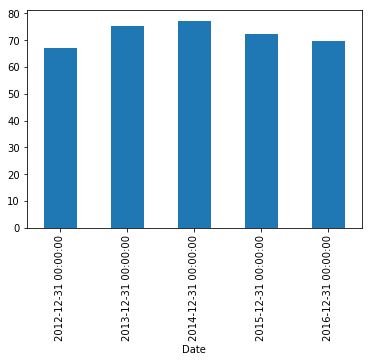

In [78]:
df['Close'].resample('A').mean().plot.bar()

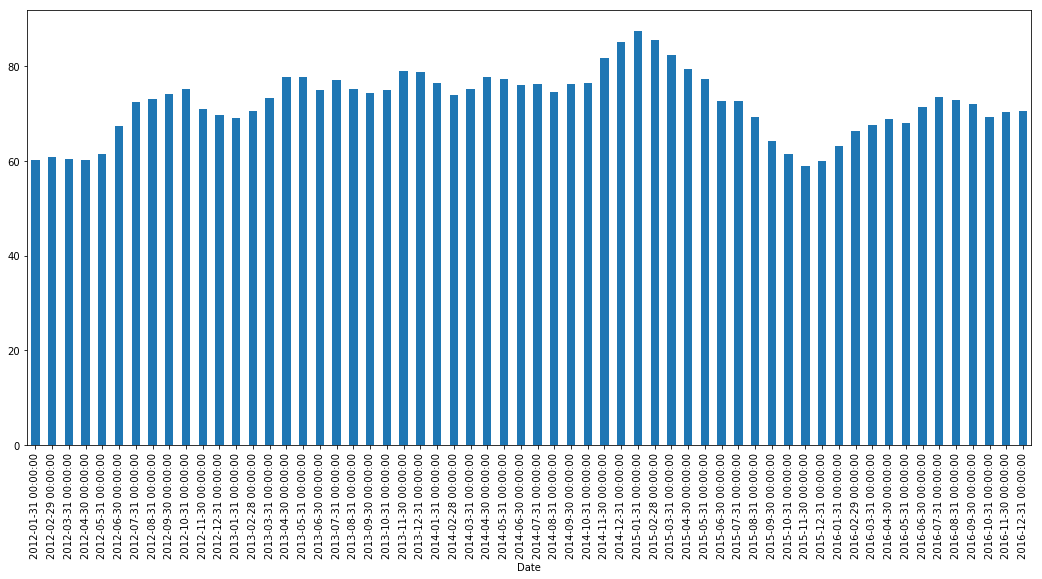

In [81]:
df['Close'].resample('M').mean().plot.bar(figsize=(18,8))#by month

In [82]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [84]:
df.shift(periods=1).head()#so this shifted all data up one so now no value for first day and lose last row

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235
2012-01-05,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-06,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-09,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220


In [85]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [86]:
df.tshift(freq='M').head()#so this gives all data last day of month for index since chose frequency M

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [87]:
df.tshift(freq='A').head()#so this gives all data last day of year for index since chose frequency A

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-12-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-12-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-12-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-12-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [88]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


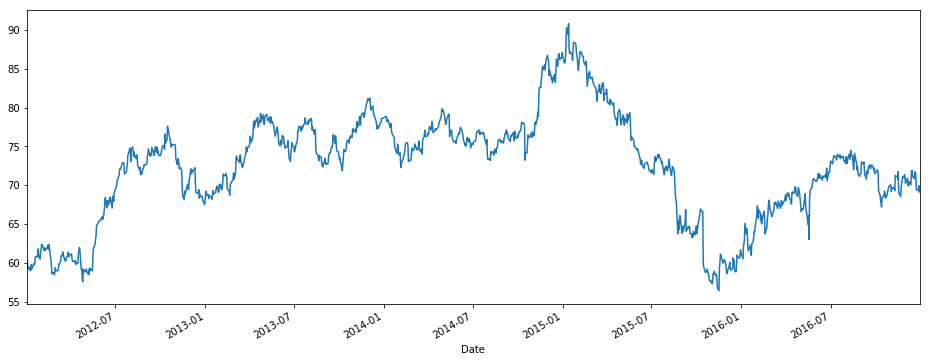

In [89]:
df['Open'].plot(figsize=(16,6))

# Let's average out by week

In [91]:
df.rolling(7).mean().head(14)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


In [92]:
#  So first 6 rows nothin and 7th row is mean of 7 rows.  first 6 rows empty because didn't have enough data to get a 7 day rolling average

In [93]:
df.rolling(7).mean().tail(14)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-12,70.320001,70.870000,69.962856,70.552856,8.375900e+06,69.825051
2016-12-13,70.475715,71.052858,70.128571,70.684286,8.692086e+06,70.026953
2016-12-14,70.618572,71.265715,70.324285,70.884285,8.426586e+06,70.295976
2016-12-15,70.791429,71.467145,70.542857,70.987142,8.334914e+06,70.468990
2016-12-16,70.954286,71.608573,70.642856,71.041429,9.889000e+06,70.522880
2016-12-19,71.005713,71.730001,70.717141,71.218572,9.752586e+06,70.698731
2016-12-20,71.214286,71.944287,70.969999,71.467143,9.088500e+06,70.945487
2016-12-21,71.441429,71.975715,71.144285,71.405715,8.519486e+06,70.884507
2016-12-22,71.380001,71.834286,70.801427,71.090000,8.979386e+06,70.571096


In [94]:
#here since started at end we did have enough info for 7 day moving average

In [95]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [99]:
round(df.rolling(7).mean().tail(14),2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-12,70.32,70.87,69.96,70.55,8375900.00,69.83
2016-12-13,70.48,71.05,70.13,70.68,8692085.71,70.03
2016-12-14,70.62,71.27,70.32,70.88,8426585.71,70.30
2016-12-15,70.79,71.47,70.54,70.99,8334914.29,70.47
2016-12-16,70.95,71.61,70.64,71.04,9889000.00,70.52
2016-12-19,71.01,71.73,70.72,71.22,9752585.71,70.70
2016-12-20,71.21,71.94,70.97,71.47,9088500.00,70.95
2016-12-21,71.44,71.98,71.14,71.41,8519485.71,70.88
2016-12-22,71.38,71.83,70.80,71.09,8979385.71,70.57


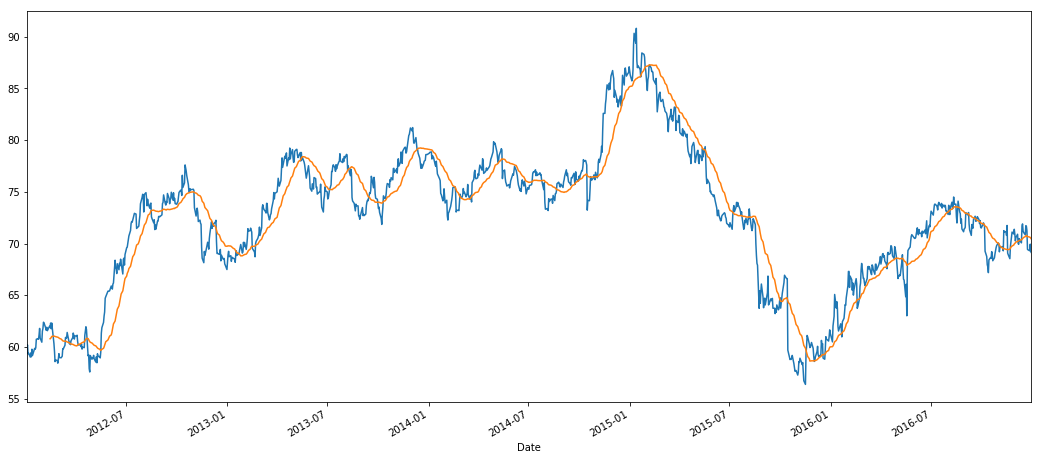

In [103]:
df['Open'].plot()
df.rolling(window=30).mean()['Close'].plot(figsize=(18,8))

#so orange line is smoother

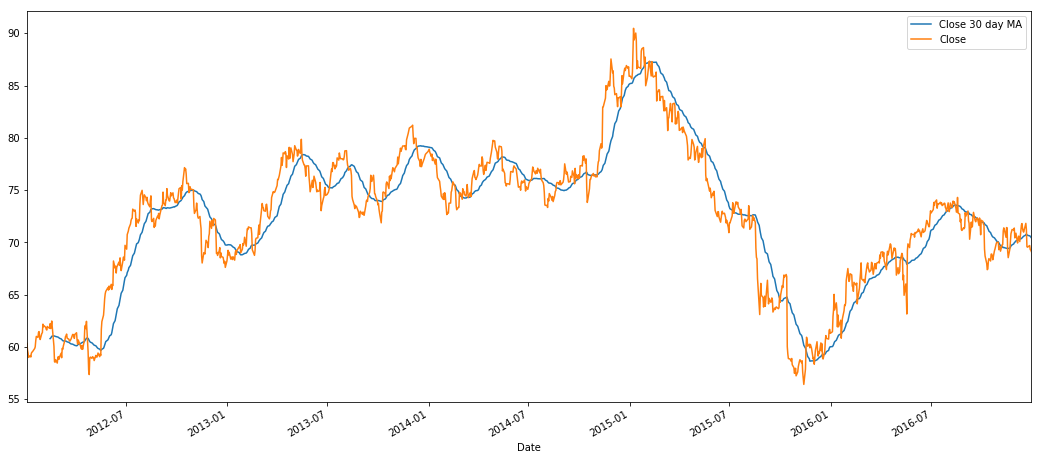

In [108]:
df['Close 30 day MA']=df['Close'].rolling(window=30).mean()
df[['Close 30 day MA','Close']].plot(figsize=(18,8))

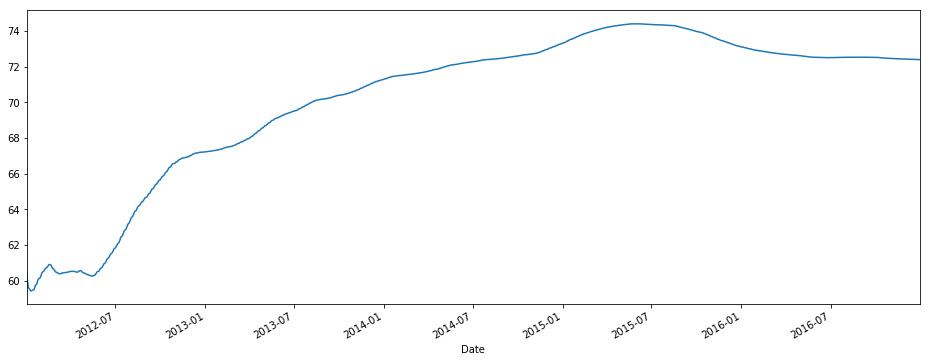

In [110]:
df['Close'].expanding().mean().plot(figsize=(16,6))#expanding instead of rolling. Takes into account all values since beginning last point is average of all points that came before it

In [111]:
#Bollinger bands

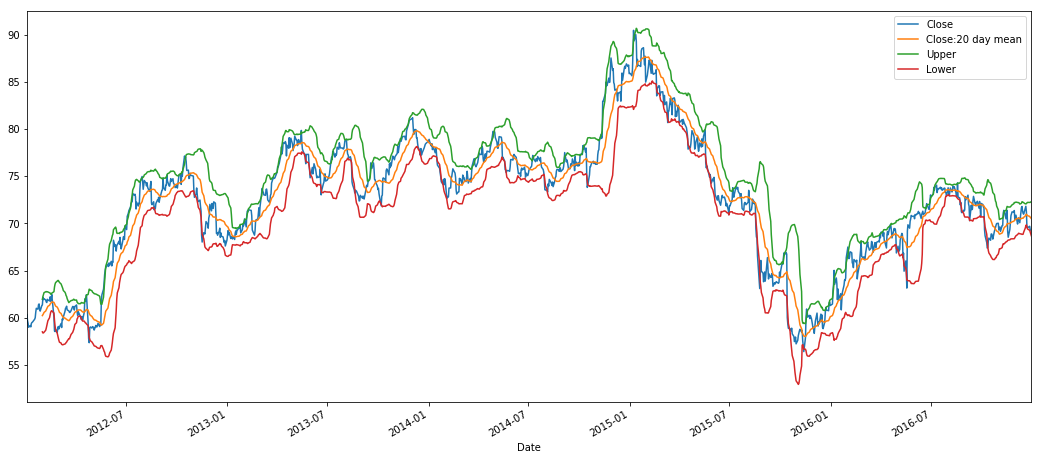

In [113]:
#close 20 MA(moving average)
df['Close:20 day mean']=df['Close'].rolling(20).mean()

#upper =20MA+2*std(20)-->i.e. the rolling std
df['Upper']=df['Close:20 day mean']+2*(df['Close'].rolling(20).std())

#lower=20MA-2*std
df['Lower']=df['Close:20 day mean']-2*(df['Close'].rolling(20).std())


#close
df[['Close','Close:20 day mean', 'Upper', 'Lower']].plot(figsize=(18,8))

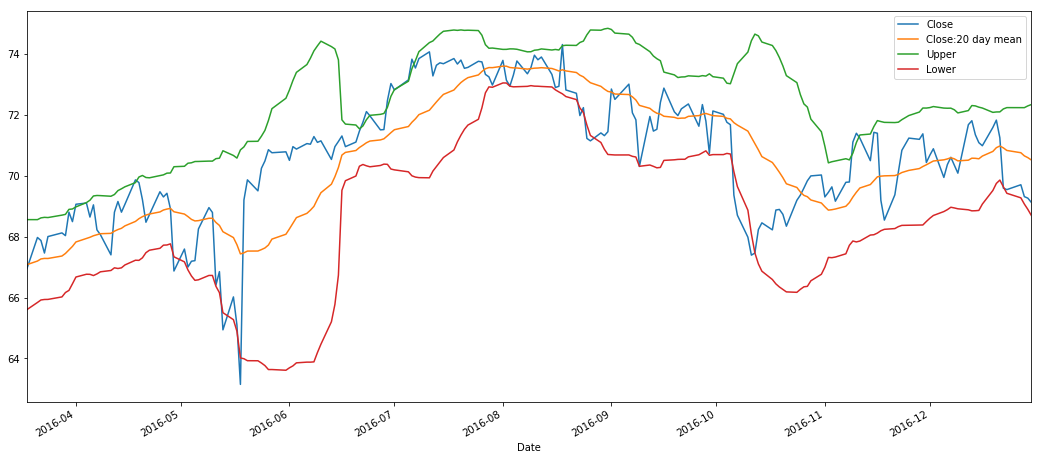

In [116]:
df[['Close','Close:20 day mean', 'Upper', 'Lower']].tail(200).plot(figsize=(18,8))

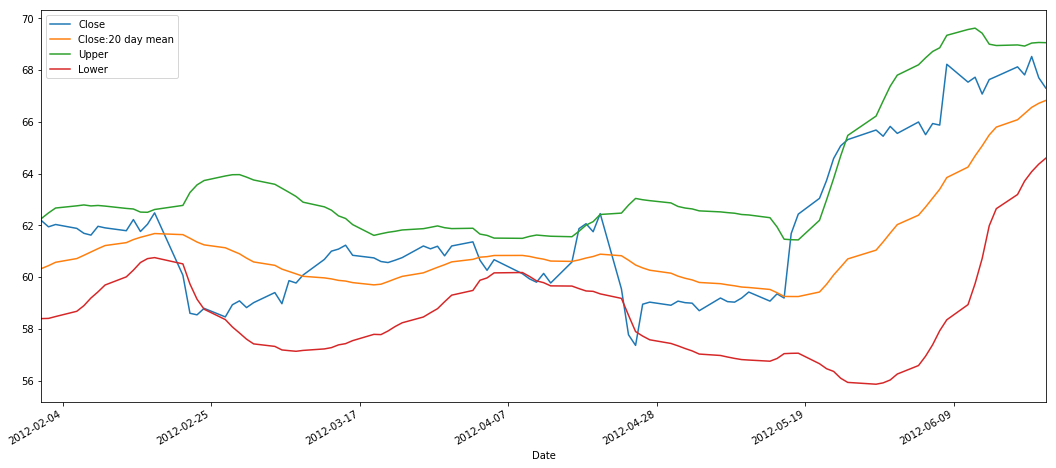

In [117]:
df[['Close','Close:20 day mean', 'Upper', 'Lower']][20:120].plot(figsize=(18,8))